In [ ]:
# inspired by lazyprogrammer


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

from wordcloud import WordCloud


In [ ]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.columns = ['labels', 'data']

In [ ]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


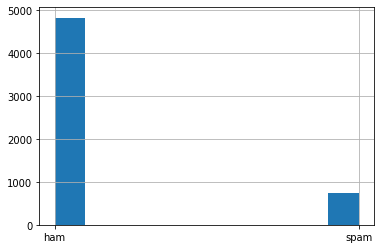

In [ ]:
df['labels'].hist()

In [ ]:
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})

Y = df['b_labels'].to_numpy()


In [ ]:
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)


In [ ]:
# featurizer = TfidfVectorizer(decode_error='ignore')
# Xtrain = featurizer.fit_transform(df_train)
# Xtest = featurizer.transform(df_test)

featurizer = CountVectorizer(decode_error='ignore')
Xtrain = featurizer.fit_transform(df_train)
Xtest = featurizer.transform(df_test)


In [ ]:
Xtrain

<3733x6929 sparse matrix of type '<class 'numpy.int64'>'
	with 48920 stored elements in Compressed Sparse Row format>

In [ ]:
model = MultinomialNB()
model.fit(Xtrain, Ytrain)

print("train acc:", model.score(Xtrain, Ytrain))
print("test acc:", model.score(Xtest, Ytest))


train acc: 0.993302973479775
test acc: 0.9847743338771071


In [ ]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

print("train F1:", f1_score(Ytrain, Ptrain))
print("test F1:", f1_score(Ytest, Ptest))


train F1: 0.9740932642487047
test F1: 0.9455252918287939


In [ ]:
Prob_train = model.predict_proba(Xtrain)[:,1]
Prob_test = model.predict_proba(Xtest)[:,1]

print("train AUC:", roc_auc_score(Ytrain, Prob_train))
print("test AUC:", roc_auc_score(Ytest, Prob_test))


train AUC: 0.9935160733329949
test AUC: 0.9809547551394813


In [ ]:
cm = confusion_matrix(Ytrain, Ptrain)
cm

array([[3238,   10],
       [  15,  470]])

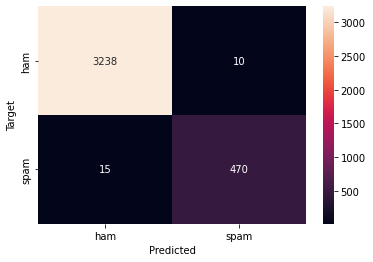

In [ ]:
def plot_cm(cm):
  classes = ['ham', 'spam']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  
  ax = sn.heatmap(df_cm, annot=True, fmt='g')
  
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")



plot_cm(cm)

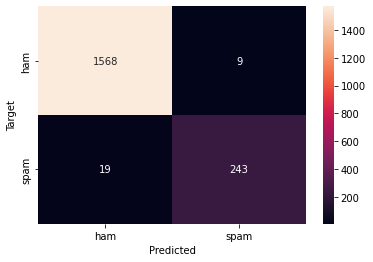

In [ ]:
cm_test = confusion_matrix(Ytest, Ptest)

plot_cm(cm_test)


In [ ]:
def visualize(label):
  words = ''

  for msg in df[df['labels'] == label]['data']:
    msg = msg.lower()
    words += msg + ' '

  wordcloud = WordCloud(width=600, height=400).generate(words)

  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()
  

In [ ]:
visualize('spam')

In [ ]:
visualize('ham')

In [ ]:
X = featurizer.transform(df['data'])

df['predictions'] = model.predict(X)


In [ ]:
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']

for msg in sneaky_spam:
  print(msg)
  

In [ ]:
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']

for msg in not_actually_spam:
  print(msg)
  